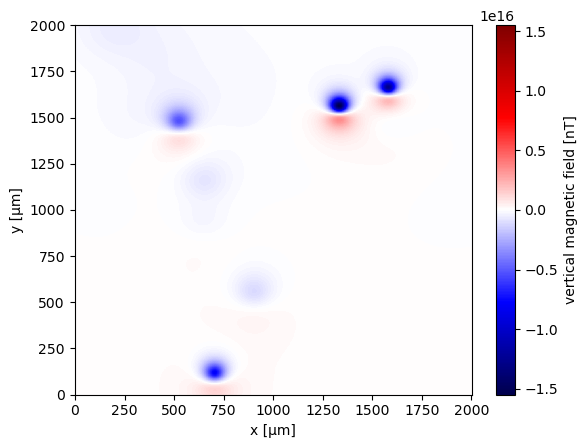

In [1]:
import harmonica as hm 
import numpy as np 
import magali as mg 

sensor_sample_distance = 5.0  #µm
region = [0, 2000, 0, 2000] #µm
spacing = 2 #µm

size = 100
mean_inclination = 30 # degrees
mean_declination = 40 # degrees
dispersion_angle = 5 # degrees

x_coords = np.random.randint(30,1970, size)
y_coords = np.random.randint(30,1970, size)
z_coords = np.random.randint(30,1970, size)

coords = (x_coords, y_coords, z_coords)

inclination, declination = mg.random_directions(
    mean_inclination,
    mean_declination,
    dispersion_angle,
    size=size,
    random_state = 5
)
intensity = abs(np.random.normal(0,100,size)) * 1e-14

moments = hm.magnetic_angles_to_vec(inclination, declination, intensity)

data = mg.dipole_bz_grid(
    region,
    spacing,
    sensor_sample_distance,
    coords,
    moments,
)

windows = mg.detect_anomalies(
    data,
    size_range = [25, 50], #µm
    detection_threshold = 0.01,
    border_exclusion= 1,
)

data.plot.pcolormesh(cmap="seismic")


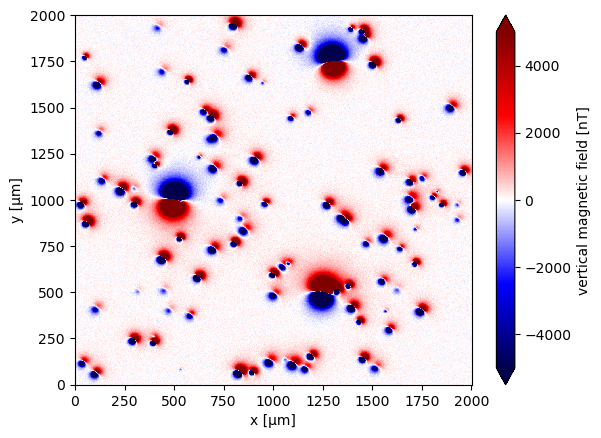

In [ ]:
import numpy as np
import verde as vd
import magali as mg
import harmonica as hm

SEED = 5
rng = np.random.default_rng(SEED)

sensor_sample_distance = 5.0  # µm
region = [0, 2000, 0, 2000]  # µm
spacing = 2  # µm

true_inclination = 30  # degrees
true_declination = 40  # degrees
true_dispersion_angle = 5  # degrees
size = 100  # number of random dipoles

directions_inclination, directions_declination = mg.random_directions(
    true_inclination,
    true_declination,
    true_dispersion_angle,
    size=size,
    random_state= SEED,
)

dipoles_amplitude = abs(rng.normal(0, 100, size)) * 1.0e-14

dipole_coordinates = (
    rng.integers(30, 1970, size), # x
    rng.integers(30, 1970, size), # y
    rng.integers(-20, -1, size), # z
)

dipole_moments = hm.magnetic_angles_to_vec(
    inclination=np.concatenate([directions_inclination, [10, -10, -5]]),
    declination=np.concatenate([directions_declination, [10, 170, 190]]),
    intensity=np.concatenate([dipoles_amplitude, [5e-11, 5e-11, 5e-11]]),
)

data = mg.dipole_bz_grid(
    region, spacing, sensor_sample_distance,
    dipole_coordinates, dipole_moments
)

noise_std_dev = 100  # nT
noise = rng.normal(loc=0, scale=noise_std_dev, size=data.shape)
data.values += noise

data.plot.pcolormesh(cmap="seismic", vmin=-5000, vmax=5000)